## Ocena 96%

# Inżynieria lingwistyczna

Ten notebook jest oceniany półautomatycznie. Nie twórz ani nie usuwaj komórek - struktura notebooka musi zostać zachowana. Odpowiedź wypełnij tam gdzie jest na to wskazane miejsce - odpowiedzi w innych miejscach nie będą sprawdzane (nie są widoczne dla sprawdzającego w systemie).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Zadanie 1 - tokenizacja (12 pkt)

Jedną z nowoczesnych technik tokenizacji jest BPE - byte-pair encoding [1]. Technika ta polega na podzielenie słów na częste podsłowa (a'la morfemy?). W przeciwieństwie do podejść lingwistycznych, wymagających zwykle ręcznie napisanych reguł tworzenia morfemów czy nawet słowników lematów, BPE znajduje je heurystycznie poprzez wyznaczenie najczęstszych przylegających do siebie sekwencji znaków.

Algorytm przebiega w następujących krokach.
1. Podziel wszystkie słowa na symbole (początkowo pojedyncze znaki)
2. Wyznacz najczęściej występującą obok siebie parę symboli 
3. Stwórz nowy symbol będący konkatenacją dwóch najczęstszych symboli.

Uwaga 1: każde słowo zakończone jest specjalnym symbolem końca wyrazu.

Uwaga 2: tworzenie nowego symbolu nie powoduje usuniecie starego tj. zawsze jednym z możliwych symboli jest pojedynczy znak, ale jeśli można to stosujemy symbol dłuższy.

Przykład: korpus w którym występuje ,,ala'' 5 razy i ,,mama 10 razy''
1. Dzielimy słowa na symbole ,,a l a END'' ,,m a m a END''  gdzie END jest symbolem końca wyrazu.
2. Najczęstsza para obok siebie to ,,m a'' (20 razy)
3. Nowy symbol ,,ma''
4. Nowy podział ,,a l a END'' ,,ma ma END''
5. Najczęstsza para ,,ma ma'' (10 razy)
6. Nowy symbol ,,mama''
7. Nowy podział ,,a l a END'' ,,mama END''
8. itd.

W pliku ,,brown_clusters.tsv'' pierwsza kolumna to identyfikator skupienia (nie używamy w tym zadaniu), druga kolumna to wyrazy, a trzecia to ich liczności w pewnym korpusie tweetów. Zaimplementuj technikę BPE i przetesuj ją na tych słowach.

Parametrem algorytmu BPE jest `number_of_iterations` czyli liczba iteracji (łączeń symboli). Dodatkowo implementacja powinna mieć parametr `verbose`, którego wartość `True` powinna skutkować wypisywaniem na konsolę wykonywanych operacji (tj. łączeń).

[1] Sennrich, R., Haddow, B., and Birch, A. (2016). Neural machine translation of rare words with subword units. In ACL 2016.

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
brown_df = pd.read_csv('brown_clusters.tsv', sep='\t', header=0, names=['cluster', 'word', 'count'])

number_of_iterations = 10
def preform_bpe(brown_df, number_of_iterations, verbose = False):
        
    """
    Funckcja przyjmuje ramkę w formacie analogicznym do obiektu brown_df (wczytany wyżej)
     oraz liczbę iteracji.
    Wyjściem funkcji powinna być lista słów z poszczególnymi tokenami/symbolami oddzielonymi spacją.
    Za znak końca wyrazu przyjmij END. 
    """
    def replace_tuples(xs, old, new):
        i, N, M = 0, len(xs), len(old)
        res = []
        while i < N:
            if i < N - M + 1 and xs[i:i+M] == old:
                res.append(new)
                i += M
            else:
                res.append(xs[i])
                i += 1
        return res
    
    def count_tuples(count, words, M=2):
        counts = defaultdict(int)
        for count, chars in zip(count, words):
            for i in range(len(chars) - M + 1):
                counts[tuple(chars[i:i+M])] += count
        return counts
    
    brown_df = brown_df.copy()
    brown_df.word = brown_df.word.map(lambda x: list(str(x)) + ['END'])
    for i in range(number_of_iterations):
        counts = count_tuples(brown_df['count'], brown_df.word)
        old = list(max(counts.items(), key=lambda x: x[1])[0])
        new = ''.join(old)
        #if verbose: print(old)
        brown_df.word = brown_df.word.map(lambda ws: replace_tuples(ws, old, new))
                
    return list(brown_df.word.map(lambda x: ' '.join(x)))

Test implementacji:

In [2]:
from nose.tools import assert_list_equal
data = {'cluster': range(2), 'word':['ala', 'mama'], 'count': [5,10]}
df = pd.DataFrame (data, columns = ['cluster', 'word', 'count'])
vocab = preform_bpe(df, 1)
assert_list_equal(vocab, ['a l a END', 'ma ma END'])

Spraw aby Twoja implementacja wypisywała kolejne łączone ze sobą symbole (parametr `verbose`) i uruchom Twoją funkcję na np. 50 iteracji, obserwując jakie tokeny są tworzone.

In [3]:
preform_bpe(brown_df, 50, verbose=True)

['e', 'END']
['t', 'END']
['s', 'END']
['i', 'n']
['t', 'h']
['d', 'END']
['y', 'END']
['.', 'END']
['o', 'END']
['r', 'END']
['a', 'n']
['>', 'END']
['o', 'n']
['o', 'u']
['g', 'END']
['a', 'END']
['l', 'END']
['in', 'gEND']
['<', '@']
['<@', 'M']
['<@M', 'E']
['<@ME', 'N']
['<@MEN', 'T']
['<@MENT', 'I']
['<@MENTI', 'O']
['<@MENTIO', 'N']
['<@MENTION', '>END']
['r', 'e']
['i', 'END']
['th', 'eEND']
['e', 'n']
['o', 'm']
['t', 'oEND']
[',', 'END']
['!', 'END']
['e', 'r']
['h', 'a']
['e', 'rEND']
['i', 't']
[':', 'END']
['y', 'ou']
['a', 'r']
['a', 'l']
['o', 'r']
['o', 'w']
['.', '.END']
['s', 't']
['k', 'END']
['i', 'sEND']
['f', 'END']


['\\ iEND',
 '/ i / END',
 't o d a y - iEND',
 'n ow iEND',
 '# you e v erEND',
 'i f in al l yEND',
 '「 iEND',
 '- i - END',
 'in e v aEND',
 '» iEND',
 'w ha t t a y aEND',
 'i i i i i i i i i iEND',
 '\ue6d1 END',
 'i k in d aEND',
 'l o l - iEND',
 'i a c t u al l yEND',
 'w a d d y aEND',
 '# a s l on g a s you END',
 'd o you END',
 '\u200e \u200b iEND',
 'i ̇ END',
 'ï END',
 '# l o l a t g i r l s w h oEND',
 '# r t i f you END',
 'i j s tEND',
 '« iEND',
 '• iEND',
 'w h o d aEND',
 'w ha d y aEND',
 ') iEND',
 '+ iEND',
 '# you r f a c e m a k e s m eEND',
 'i i i i i i i iEND',
 '` iEND',
 'i i i i i i iEND',
 'i al re a d yEND',
 '_ iEND',
 '# you m a k e m eEND',
 '* iEND',
 '| iEND',
 '# u r b o y f r i en d e v erEND',
 'w h en iEND',
 'ι END',
 "d on ' t c h aEND",
 "w h o ' d aEND",
 'd you END',
 'w ha d d a y aEND',
 'i on l yEND',
 'i j u s sEND',
 'i al w a y sEND',
 'i i i i iEND',
 'd on c h aEND',
 '( iEND',
 "d ' y aEND",
 'ı END',
 '# u e v erEND',
 'in e v e

- Jakie angielskie słowo jako pierwsze dostało swój własny token?

Jako pierwsze własny token dostało słowo "in", czyli 7. najczęstsze słowo wg Oxford English Corpus

- Jakie są zalety korzystania z tokenizacji BPE w kontekście tworzenia reprezentacji do problemu klasyfikacji tekstu (problem OOV, odnieś się do k-gramów i n-gramów)? Jakie są zalety BPE w przypadku przetwarzania różny rodzajów języków (np. fleksyjne, aglutynacyjne)?

Wielkość słownika języków fleksyjnych i aglutynacyjnych rośnie kombinatorycznie od liczby morfemów gdy można je dowolnie komponować, a jeśli morfemy mogą się też powtarzać, to słownik ma nieskończoną wielkość. W języku z nieskończoną wielkością słownika (np. j. niemiecki), liczba n-gramów też jest nieskończona, więc poleganie na n-gramach sprawi, że potencjalnie (nieskończenie) dużo napotkanych poza zbiorem uczącym słów będzie poza słownikiem (OOV). Przypisanie wielu słowom przez model języka prawdopodobieństwa wystąpienia równego 0 nie będzie odzwierciedlać rzeczywistości. Tokenizacja oparta na znakach (k-gramy, BPE) pozwala (szczególnie w j. fleksyjnych i aglutynacyjnych)  ograniczyć wielkość słownika do skończonej i praktycznej wielkości. BPE pozwala na dodatkowe skompresowanie słownika przez iteracyjne łączenie najczęściej występujących w korpusie par k-gramów. Tokenizacja BPE i k-gramy są też przydatne w innych językach, bo w praktyce słowa OOV wynikają z nieskończonych możliwości powtórzeń/wielkości/modyfikacji znaków czy różnych błędów.

Wróć do implementacji i zakomentuj wypisywanie (funkcje print) informacji z funkcji `preform_bpe`.

# Zadanie 2 - klasyfikacja (15 pkt)

Poniższy kod powinien wczytać i ztokenizować zbiór danych dot. analizy wydźwięku. Jeśli nie masz biblioteki `nltk` musisz ją zainstalować.

In [3]:
from helpers import DataSet
training_set = DataSet(['tweets.txt'])

Reading data set ['tweets.txt']


Poniżej znajdziesz przykład odczytu jednego tweeta z obiektu DataSet

In [4]:
for i in training_set.tweets:
    print(i.text)
    print(i.tokens)
    print(i.clazz)
    break

dear @Microsoft the newOoffice for Mac is great and all, but no Lync update? C'mon.
['dear', '@microsoft', 'the', 'newooffice', 'for', 'mac', 'is', 'great', 'and', 'all', ',', 'but', 'no', 'lync', 'update', '?', "c'mon", '.']
negative


Systemy IL często pracują z bardzo dużą liczbą cech, które są rzadkie np. cechy Bag-Of-Words, cechy n-gramowe itd. Powoduje to że klasyczna macierz zawierająca przykłady uczące ($n$) i cechy ($d$) rośnie do bardzo dużych rozmiarów ($nd$) nawet dla małych zbiorów uczących (w sensie liczby przykładów). Ponadto samo przechowywanie w pamięci słownika mapującego konkretne słowa/n-gramy na indeksy kolumn macierzy może być bardzo kosztowne pamięciowo przy dużych rozmiarach słownika.

Istnieje jednak technika, która pozwala nam na ominięcie tej przeszkody: haszowanie cech. Opis tej techniki znajdziesz na stronie:  https://en.wikipedia.org/wiki/Feature_hashing Jest ona też implementowana w obiekcie `sklearn.feature_extraction.FeatureHasher`. Zapoznaj się z opisem techniki i wykonaj poniższe polecenia.

- Wykorzystując haszowanie cech wytrenuj wybrany klasyfikator (najlepiej taki, który się szybko liczy) na zbiorze uczącym dla cech Bag-of-words (możesz też spróbować cechy n-gramowe). Możesz wykorzystać gotową tokenizację we właściwości `.tokens`.

In [16]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

split = 0.2
seed = 1337
Clas = SVC
X = [tweet.tokens for tweet in training_set.tweets]
y = [tweet.clazz for tweet in training_set.tweets]

def make_dataset(n_features):
    h = FeatureHasher(n_features=n_features, input_type='string')
    return train_test_split(h.transform(X), y, test_size=split, random_state=seed)

X_tr, X_te, y_tr, y_te = make_dataset(n_features=937)
Clas().fit(X_tr, y_tr).score(X_te, y_te)

0.5906593406593407

- Stwórz wykres zależności wybranej miary klasyfikacji od wymiarów macierzy danych (chodzi o liczbę cech do których haszujemy cechy oryginalne). Wystarczy przetestować kilka (>=4) wybranych wartości na skali logarytmicznej.

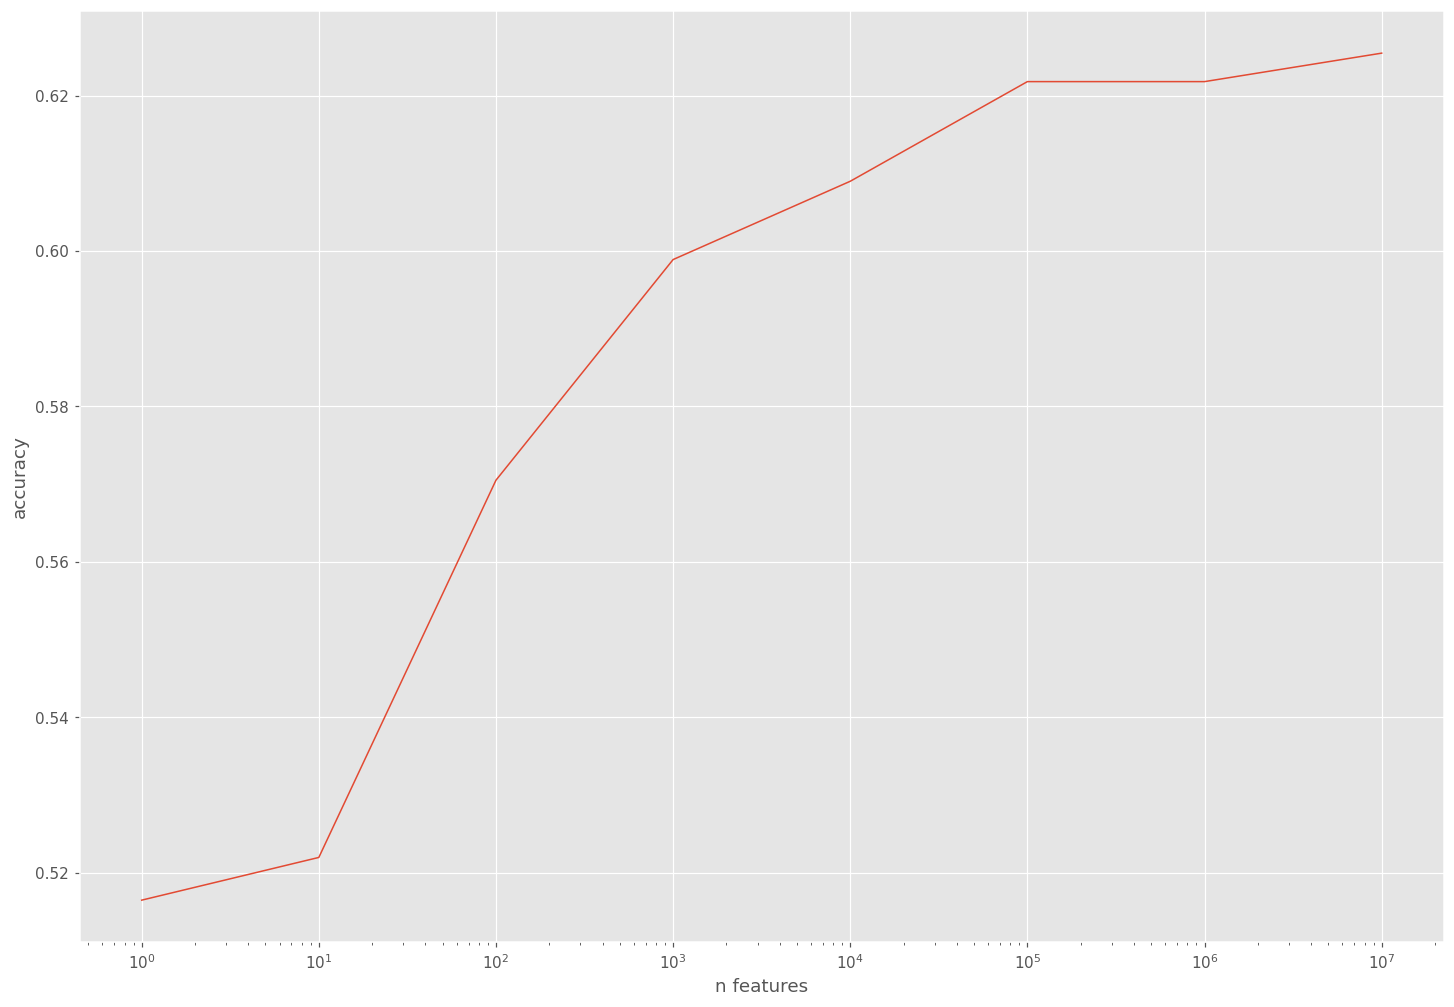

In [17]:
import matplotlib.pyplot as plt
from sklearn import metrics
ns = [10**i for i in range(0, 8)]
scores = []
for n in ns:
    X_tr, X_te, y_tr, y_te = make_dataset(n_features=n)
    scores.append(Clas().fit(X_tr, y_tr).score(X_te, y_te))
plt.plot(ns, scores)
plt.xscale('log'); plt.ylabel('accuracy'); plt.xlabel('n features')
plt.show()

 - Obserwując stworzony wykres - skomentuj. Jak dużo jakości klasyfikacji się traci (albo zyskuje?) korzystając z mniejszej liczby haszowanych cech? Często klasyfikatory bardzo dobrze działają nawet przy liczbie haszowanych cech dla których na pewno istnieją konflikty cech oryginalnych - jak myślisz dlaczego? (Pomyśl o interpretacji takich skonfliktowanych cech).

Dla wybranego klasyfikatora (SVM), jakość klasyfikacji (accuracy) rośnie od ~0.52 dla 1 cechy, do ~0.62 dla 10^5 cech. Zwiększanie liczby cech ponad 10^5 skutkuje bardzo małymi przyrostami jakości. Korzystając ze zbyt małej liczby cech można stracić około 10% jakości klasyfikacji.

Im mniej cech tym większe prawdopodobieństwo kolizji pomiędzy nimi. Jeśli kolidujące cechy są nieskorelowane, to intuicyjnie klasyfikator powinien działać gorzej. W hashowaniu cech używa się jednak drugiej funkcji hashującej, która decyduje o znaku wartości dodanej do i-tego elementu wektora. Wynika z tego, że jeśli dwie cechy ze sobą kolidują i druga f-a hashująca da dla tych wartości cech odwrotne znaki, to wartości dodawane do i-tego elementu wektora się anulują, więc nie będzie kolizji.

 - W poprzednim zadaniu wczytałeś wynik grupowania Browna do pamięci. Wytrenuj klasyfikator na reprezentacji ,,Bag-of-clusters'' tj. w kolumnach zamiast słów/n-gramów będziesz miał grupy.

In [18]:
c2v = brown_df.cluster.unique()
c2v = dict(zip(c2v, np.eye(len(c2v))))
w2v = {w: c2v[c] for w, c in zip(brown_df.word, brown_df.cluster)}
X = np.array([np.sum([w2v[t] for t in tweet.tokens if t in w2v], axis=0) for tweet in training_set.tweets])
print(X.shape)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=split, random_state=seed)
Clas().fit(X_tr, y_tr).score(X_te, y_te)

(5459, 937)


0.6034798534798534

- Podsumuj eksperymenty: poznałeś dwie możliwości ograniczenia liczby cech - zastąpienie słów ich grupami i haszowanie cech. Jakie są wady i zalety obydwu podejść?

SVM z hashowanymi cechami (dla n_cech=937) uzyskał accuracy 0.590, a SVM uczony na reprezentacji Bag-of-Clusters (n_cech=937) uzyskał accuracy 0.603. Subiektywnie nie widzę znaczącej różnicy w jakości klasyfikacji, a hashowanie ma dodatkową możliwość zwiększenia liczby cech małym kosztem i bez korpusu, czego nie można zrobić z Bag-of-Clusters.

Hashowanie cech:
- Zalety: prostota, ultra szybkie obliczeniowo, brak korpusu -> brak OOV
- Wady: możliwość kolizji, funkcja hashująca "nie wie" nic o słowach

Bag-of-clusters:
- Zalety: możliwość semantycznego grupowania (np. w grupowaniu Browna brany jest pod uwagę kontekst wystąpienia słowa)
- Wady: konieczność grupowania słów w korpusie, słowa poza korpusem są OOV